 # STEP-1 Import and Explore Data

In [1]:
# Import all the given datasets and explore shape and size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling


In [2]:
# Load and Review Data
signal_df = pd.read_csv('signal-data.csv')
signal_df.head(10)
signal_df.shape

(1567, 592)

In [3]:
# There are significant number of Columns!!!, we may have to drop columns based on correlations and other parameters

In [4]:
# Generate Report on the data informing about all the pitfalls
c=signal_df.isnull().sum()
#signal_df.profile_report()

In [5]:
c.describe()

count     592.000000
mean       70.863176
std       241.476304
min         0.000000
25%         2.000000
50%         6.000000
75%         9.000000
max      1429.000000
dtype: float64


Since there are too many columns we will be straight away dropping columns with
more than 50% Missing Values

In [6]:
signal_df.columns[signal_df.isnull().mean() < 0.5]
signal_df_new = signal_df[signal_df.columns[signal_df.isnull().mean()<0.5]]
signal_df_new.shape

(1567, 564)

In [7]:
# Also let us drop the time column
signal_df_new=signal_df_new.drop(['Time'],axis=1)

In [8]:
signal_df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


We will now use correlation matrix to filter out columns with high correlation

In [9]:
#signal_df_new.corr()
signal_df_col5=signal_df[['5']]
#pd.value_counts(signal_df_col5.values.flatten())
signal_df['5'].value_counts()
#signal_df_col5.isnull().sum()

100.0    1553
Name: 5, dtype: int64

Since column 5 has mostly the value of 100 , i.e about 1553 count times, we can drop this column as there is not much variance in this column or very little variation and it would have very little effect on the output.



In [10]:
signal_df_new=signal_df_new.drop(['5'],axis=1)
signal_df_new.head()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [11]:
# Let us check for any Nanor missing Values

c=signal_df_new.isnull().sum()
c.sort_values(ascending=True)

Pass/Fail      0
252            0
254            0
255            0
291            0
            ... 
562          273
385          715
519          715
247          715
112          715
Length: 562, dtype: int64

Let us drop the columns 385, 519,247&112 as they have around 715 missing values which is close to about 50%


In [12]:
signal_df_new=signal_df_new.drop(['385','519','247','112'],axis=1)
signal_df_new.head()
signal_df_new.shape

(1567, 558)

In [13]:
cor_matrix= signal_df_new.corr().abs()
print(cor_matrix)

                  0         1         2         3         4         6  \
0          1.000000  0.145071  0.004775  0.007655  0.011047  0.002281   
1          0.145071  1.000000  0.005802  0.007603  0.001641  0.025702   
2          0.004775  0.005802  1.000000  0.298935  0.095891  0.136225   
3          0.007655  0.007603  0.298935  1.000000  0.058483  0.685835   
4          0.011047  0.001641  0.095891  0.058483  1.000000  0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018472  0.009417  0.025548  0.034779  0.044016  0.041296   
587        0.025909  0.017290  0.029479  0.039309  0.031145  0.034184   
588        0.028196  0.010134  0.030943  0.033780  0.026204  0.032359   
589        0.004177  0.044834  0.033226  0.081157  0.051428  0.044227   
Pass/Fail  0.025144  0.002615  0.000957  0.024631  0.013760  0.016244   

                  7         8         9        10  ...       577       582  \
0          0.031510  0.052731  0.009052  0.00

In [14]:
# Choosing the upper triangular matrix which is nothing but a mirror image of 
# the correlation values
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

            0         1         2         3         4         6         7  \
0         NaN  0.145071  0.004775  0.007655  0.011047  0.002281  0.031510   
1         NaN       NaN  0.005802  0.007603  0.001641  0.025702  0.012084   
2         NaN       NaN       NaN  0.298935  0.095891  0.136225  0.273970   
3         NaN       NaN       NaN       NaN  0.058483  0.685835  0.138290   
4         NaN       NaN       NaN       NaN       NaN  0.074368  0.916410   
...        ..       ...       ...       ...       ...       ...       ...   
586       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pass/Fail NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10  ...       577       582       583 

Since the number of columns are very high, the columns with high correlation with each other are being dropped. 
The threshold for the correlation value is around 80% and these columns are being dropped.

In [15]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(); print(to_drop)


['7', '26', '27', '30', '36', '46', '50', '54', '60', '65', '66', '70', '96', '98', '101', '104', '105', '106', '123', '124', '127', '130', '140', '147', '148', '152', '154', '155', '164', '165', '174', '187', '196', '197', '199', '202', '203', '204', '205', '206', '207', '209', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '412', '413', '415', '416', '417'

In [16]:
drops = set(to_drop)
#x = x.drop(columns=drops)
signal_df_new = signal_df_new.drop(columns=drops)
signal_df_new.shape

(1567, 336)

In [17]:
signal_df_new.head()

,0,1,2,3,4,6,8,9,10,11,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,1.5005,0.0162,-0.0034,0.9455,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,-0.0005,-0.0148,0.9627,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,0.0041,0.0013,0.9615,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,-0.0124,-0.0033,0.9629,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,-0.0031,-0.0072,0.9569,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.0202,0.0149,73.8432,-1


So now the new number of columns are down to 336 from 592.

We initially dropped all the columns with more than 50% missing values and we also dropped columns with high correlation
We are still seeing some cells with the NaN values and hence we need to replace this NaN cells with the median of the respective columns

In [18]:
m=signal_df_new.median()
m.head(50)

0     3011.49000
1     2499.40500
2     2201.06670
3     1285.21440
4        1.31680
6      101.51220
8        1.46160
9       -0.00130
10       0.00040
11       0.96580
12     199.53560
13       0.00000
14       8.96700
15     412.21910
16       9.85175
17       0.97260
18     189.66420
19      12.49960
20       1.40600
21   -5523.25000
22    2664.00000
23   -3820.75000
24     -78.75000
25       1.28300
28      69.15560
29       2.37780
31       3.43100
32      85.13545
33       8.76980
34      50.39640
35      64.16580
37      66.23180
38      86.82070
39     118.39930
40      78.29000
41       3.07400
42      70.00000
43     353.72090
44      10.03485
45     136.40000
47       1.25105
48     140.00775
49       1.00000
51     183.31815
52       0.00000
53       4.59600
55    2854.00000
56       0.93100
57       0.94930
58       4.57270
dtype: float64

In [19]:
medianFiller = lambda x: x.fillna(x.median())
signal_df_new = signal_df_new.apply(medianFiller,axis=0)

signal_df_new[:] = signal_df_new[:].astype('float64')  # converting the hp column from object / string type to float
print(signal_df_new.loc[[1566]])

            0        1          2          3       4        6       8       9  \
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  85.1011  1.4616 -0.0013   

          10      11  ...       570     571   572     573     582     583  \
1566  0.0004  0.9658  ...  528.7918  2.0831  6.81  0.4774  0.4987  0.0181   

         586     587       589  Pass/Fail  
1566  0.0117  0.0162  137.7844       -1.0  

[1 rows x 336 columns]


We have now trimmed the columns and also treated whatever missing values were there with the median values.
We will now check for outliers and then remove them from our data usinf Z-score method.
The criteria that we will be using here is that any data point with z score >3 is classified as an outlier and will be classified as a NaN and then this value will replaced with the median of the data

In [20]:
from scipy.stats import zscore
df_zscore=signal_df_new.apply(zscore)
df_zscore

C:\Users\VISNN\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,0,1,2,3,4,6,8,9,10,11,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,0.224463,0.849523,-0.436430,0.035804,-0.050121,-0.564354,0.509848,1.128455,-0.381577,-1.515617,...,0.190142,0.034410,-0.226018,-0.120518,0.118679,-0.204833,-0.077554,-0.190165,-0.295753,-0.266621
1,1.107287,-0.383106,1.016977,0.155282,-0.059585,0.197639,0.457021,0.022620,-1.608281,-0.133006,...,0.256816,1.205944,-0.261137,-0.323417,0.530183,0.406734,-0.960123,0.411970,1.156846,-0.266621
2,-1.114000,0.798901,-0.481447,0.688278,-0.047447,-0.906768,-0.260885,0.327222,0.124169,-0.229467,...,0.257279,-0.263745,-0.199823,-0.633805,-1.262799,0.022320,2.991195,3.627143,-0.178955,3.750641
3,-0.350156,-0.199072,-0.051705,-1.104376,-0.050831,0.502662,0.343240,-0.765369,-0.370817,-0.116929,...,0.002548,-0.278290,-0.221613,-0.691776,-0.322218,-0.292200,-0.101845,-0.178804,-0.275049,-0.266621
4,0.242296,0.087328,1.117227,-0.156616,-0.047033,-0.115954,0.545066,-0.149545,-0.790478,-0.599235,...,0.085279,-0.270290,-0.227409,-0.496123,-5.906917,26.867221,-0.101845,-0.178804,-0.275049,-0.266621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.565963,-0.392832,-0.708802,3.843544,-0.047908,-3.039882,-1.631679,-0.242250,-0.629070,-0.518851,...,0.332578,-0.314650,-0.237261,-0.440165,-0.381004,-0.059222,-1.186838,-0.303775,1.103214,-0.266621
1563,0.515516,0.332706,-0.067591,-0.615706,-0.058749,-0.426519,-0.400403,-0.348198,-1.016450,-0.205352,...,0.423157,0.289297,-0.266237,0.174975,-0.763115,-0.129116,-1.186838,-0.303775,1.103214,-0.266621
1564,-0.485064,-1.447412,0.195701,-0.647916,-0.059689,-0.274555,-0.017068,-0.030354,0.027324,0.116185,...,-0.008730,0.878700,-0.254531,0.280853,-0.410397,-0.000978,-0.142330,-0.894549,-0.598172,-0.266621
1565,-1.627087,0.450658,-0.800728,-0.481365,-0.046334,-0.373534,-0.008941,-0.421038,0.328619,0.405569,...,0.221215,-0.698253,-0.223931,0.085603,0.089286,0.144634,0.383973,0.911855,-0.065629,-0.266621


In [21]:
df1=df_zscore[(df_zscore<3)]
print(df1)
df1.shape

             0         1         2         3         4         6         8  \
0     0.224463  0.849523 -0.436430  0.035804 -0.050121 -0.564354  0.509848   
1     1.107287 -0.383106  1.016977  0.155282 -0.059585  0.197639  0.457021   
2    -1.114000  0.798901 -0.481447  0.688278 -0.047447 -0.906768 -0.260885   
3    -0.350156 -0.199072 -0.051705 -1.104376 -0.050831  0.502662  0.343240   
4     0.242296  0.087328  1.117227 -0.156616 -0.047033 -0.115954  0.545066   
...        ...       ...       ...       ...       ...       ...       ...   
1562 -1.565963 -0.392832 -0.708802       NaN -0.047908 -3.039882 -1.631679   
1563  0.515516  0.332706 -0.067591 -0.615706 -0.058749 -0.426519 -0.400403   
1564 -0.485064 -1.447412  0.195701 -0.647916 -0.059689 -0.274555 -0.017068   
1565 -1.627087  0.450658 -0.800728 -0.481365 -0.046334 -0.373534 -0.008941   
1566 -0.946420 -0.562403 -0.173894       NaN -0.045885 -2.580044 -0.017068   

             9        10        11  ...       570       571    

(1567, 336)

In [22]:
c=df1.isnull().sum()
c

0             12
1             11
2              5
3             31
4              4
            ... 
583            2
586           11
587           22
589           46
Pass/Fail    104
Length: 336, dtype: int64

In [23]:
k= ['0', '1', '2', '3', '4', '6', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '28', '29', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '51', '52', '53', '55', '56', '57', '58', '59', '61', '62', '63', '64', '67', '68', '69', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '97', '99', '100', '102', '103', '107', '108', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '125', '126', '128', '129', '131', '132', '133', '134', '135', '136', '137', '138', '139', '141', '142', '143', '144', '145', '146', '149', '150', '151', '153', '156', '159', '160', '161', '162', '163', '166', '167', '168', '169', '170', '171', '172', '173', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '188', '189', '190', '191', '192', '193', '194', '195', '198', '200', '201', '208', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '248', '250', '251', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '367', '368', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '418', '419', '422', '423', '432', '433', '438', '439', '449', '450', '451', '458', '460', '461', '462', '463', '464', '465', '466', '468', '472', '474', '476', '481', '482', '483', '484', '485', '486', '487', '488', '489', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '521', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '542', '543', '544', '546', '547', '548', '549', '550', '551', '558', '559', '562', '563', '564', '565', '570', '571', '572', '573', '582', '583', '586', '587', '589']

for i in k:
   #
   print(i)
   m=signal_df_new[i].quantile(0.50)
   print(m)
   o=signal_df_new[i].quantile(0.95)
   print(o)
   signal_df_new[i]=np.where(signal_df_new[i]>o,m,signal_df_new[i]) 
signal_df_new.isnull().sum()
#sns.boxplot(data=vehicle,x=vehicle["elongatedness"])


0
3011.49
3136.283
1
2499.4049999999997
2614.531
2
2201.0667
2246.4889
3
1285.2144
2143.2736499999965
4
1.3168
2.1366
6
101.5122
110.54219999999998
8
1.4616
1.5859
9
-0.0013
0.024669999999999984
10
0.0004
0.014499999999999999
11
0.9658
0.97807
12
199.5356
203.98243000000002
13
0.0
0.0
14
8.966999999999999
13.466149999999999
15
412.2191
426.85542999999996
16
9.85175
10.60978
17
0.9726
0.9809
18
189.6642
194.26055
19
12.4996
12.610600000000002
20
1.406
1.42827
21
-5523.25
-5066.0250000000015
22
2664.0
3098.9749999999995
23
-3820.75
-1445.0750000000014
24
-78.75
3983.2749999999933
25
1.283
1.3315
28
69.1556
75.21554
29
2.3778
3.0111
31
3.431
4.67931
32
85.13544999999999
86.89528
33
8.7698
9.7137
34
50.3964
50.8506
35
64.1658
64.7149
37
66.23179999999999
66.6948
38
86.8207
87.5241
39
118.39930000000001
120.4224
40
78.29
81.74
41
3.074
5.31
42
70.0
70.0
43
353.72090000000003
366.16787
44
10.03485
10.29028
45
136.4
149.83608999999998
47
1.25105
1.4134499999999999
48
140.00775
147.61423
49
1.

0            0
1            0
2            0
3            0
4            0
            ..
583          0
586          0
587          0
589          0
Pass/Fail    0
Length: 336, dtype: int64

In [24]:
signal_df_new.describe()

,0,1,2,3,4,6,8,9,10,11,...,570,571,572,573,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3004.807479,2486.803121,2197.568502,1326.190732,1.280131,100.416791,1.455629,-0.002615,-0.000852,0.963660,...,530.013175,2.080273,9.053783,0.297149,0.499764,0.013890,0.019801,0.015149,82.625694,-0.867262
std,58.571572,66.984667,25.598669,312.722761,0.310047,5.193762,0.065991,0.012660,0.007941,0.011945,...,17.092572,0.254799,7.310565,0.092697,0.003000,0.003182,0.009260,0.006257,55.449633,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,1.191000,-0.053400,-0.034900,0.655400,...,317.196400,0.980200,3.540000,0.066700,0.477800,0.006000,-0.016900,0.003200,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,1.411250,-0.010800,-0.005600,0.958100,...,530.702700,1.982900,7.500000,0.242250,0.497900,0.011600,0.013450,0.010600,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,1.461600,-0.001300,0.000400,0.965800,...,532.398200,2.118600,8.650000,0.293400,0.500200,0.013800,0.020500,0.014800,71.900500,-1.000000
75%,3046.985000,2529.860000,2214.750000,1534.205300,1.475600,104.013300,1.503200,0.005950,0.004750,0.969800,...,533.978200,2.254400,9.815000,0.350250,0.501900,0.015800,0.026300,0.018800,103.468400,-1.000000
max,3136.150000,2614.510000,2246.488900,2130.986200,2.136600,110.278900,1.585900,0.024600,0.014200,0.978000,...,537.269100,2.459200,142.500000,0.651100,0.505600,0.023700,0.041200,0.032600,286.130300,1.000000


Let us now get an heatmap of the correlation

Text(0.5, 1.0, 'Correlation heatmap for the Data')

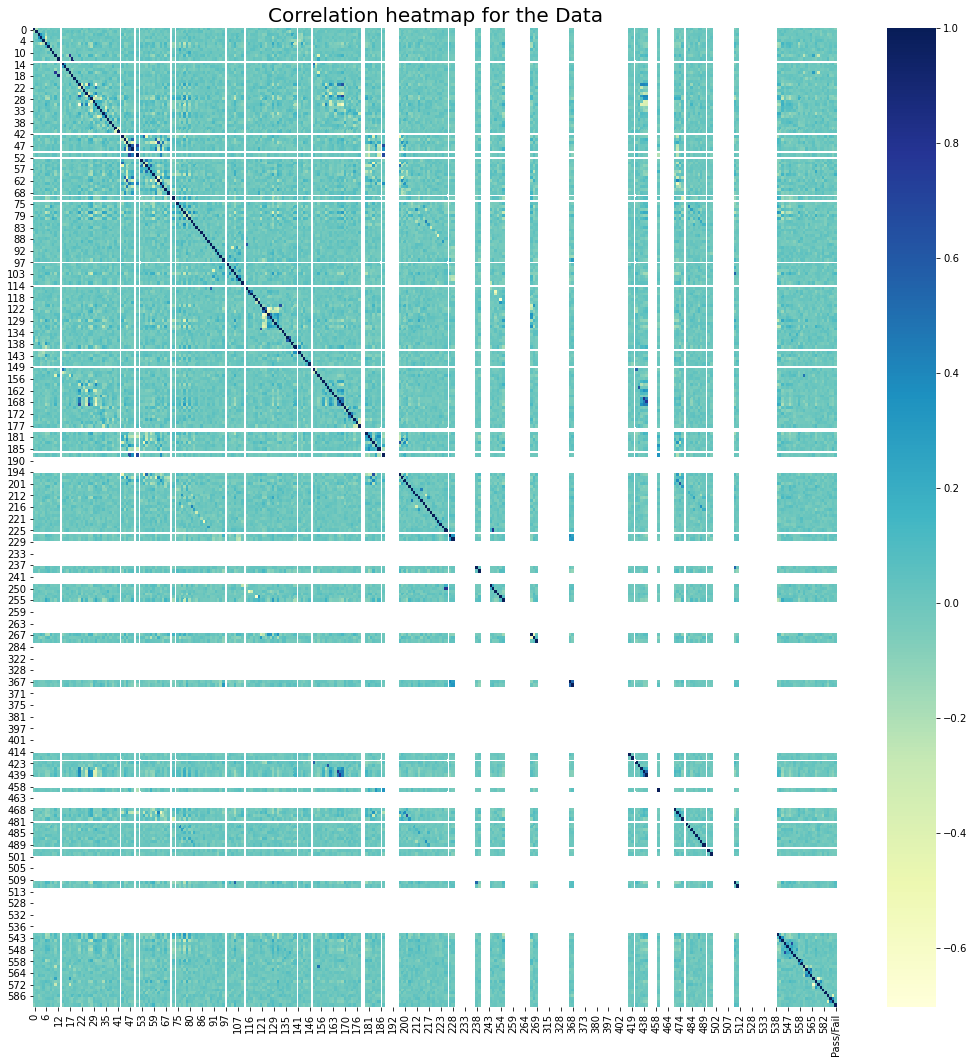

In [25]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(signal_df_new.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

Data pre-processing:
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split and standardise the data or vice versa if required.
• Check if the train and test data have similar statistical characteristics when compared with original data.

In [26]:
# Let us check the number of pass and fail counts in the dataframe
signal_df_new["Pass/Fail"].value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

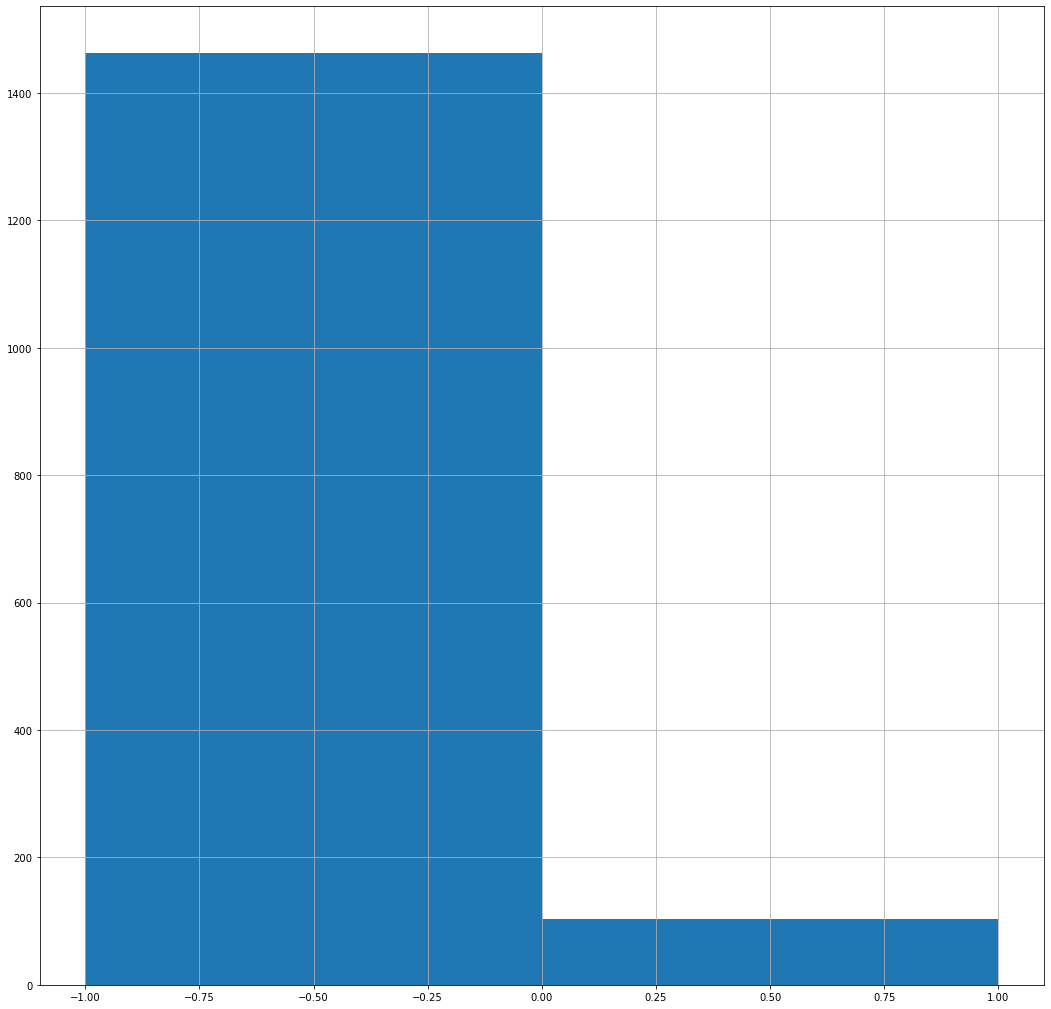

In [27]:
signal_df_new['Pass/Fail'].hist(bins=2)

As can be seen clearly the data points are mostly -1 which is Pass , about 1463 and number of Fail is only 104 which is less in number, Naturally the model will do a better job of predicting Pass decision better than fail.
And hence we will try both upsample and downsampling to ensure that fail prediction also happens accurately.

LET US USE SMOTE TO UPSAMPLE SMALLER CLASS

In [28]:
!pip install imblearn

In [29]:
!pip install delayed

In [30]:
signal_df_new_X= signal_df_new.drop(["Pass/Fail"],axis=1)
signal_df_new_Y= signal_df_new[['Pass/Fail']]

In [31]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(signal_df_new_X, signal_df_new_Y, test_size=test_size, random_state=seed)
type(X_train)
# getting the shapes
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 335)
shape of x_test:  (471, 335)
shape of y_train:  (1096, 1)
shape of y_test:  (471, 1)


In [32]:
# checking split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(signal_df_new.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(signal_df_new.index)) * 100))

69.94% data is in training set
30.06% data is in test set


In [33]:
# We need to scale the data to ensure that the data is within similar scales
# and not in different value scales

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # A scaler function (z-score scaler)

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = X_train_scaled 
X_test = X_test_scaled

In [34]:
conda update scikit-learn


Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.23.1=py38h25d0782_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\Users\VISNN\Anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    conda-package-handling-1.7.3|   py38h8cc25b3_1         721 KB
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following packages will be UPDATED:

  backports.functoo~                     1.6.

In [35]:
pip install scikit-learn==0.23.1


Note: you may need to restart the kernel to use updated packages.


In [36]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [37]:
print("Before UpSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UpSampling, counts of label '1': {} \n".format((y_train==1).sum()))

oversample=SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
#sm = SMOTE(random_state=1)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

print("After UpSampling, counts of label '-1': {}".format((y_train_res==-1).sum()))
print("After UpSampling, counts of label '1': {} \n".format((y_train_res==1).sum()))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



Before UpSampling, counts of label '-1': Pass/Fail    1024
dtype: int64
Before UpSampling, counts of label '1': Pass/Fail    72
dtype: int64 

After UpSampling, counts of label '-1': 1024
After UpSampling, counts of label '1': 1024 

After UpSampling, the shape of train_X: (2048, 335)
After UpSampling, the shape of train_y: (2048,) 



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let us fit the Logistic Regression MOdel before upsampling and then compare the accuracy after upsampling

In [38]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8980891719745223


C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

        -1.0       0.94      0.95      0.95       439
         1.0       0.23      0.22      0.23        32

    accuracy                           0.90       471
   macro avg       0.59      0.58      0.59       471
weighted avg       0.90      0.90      0.90       471

[[416  23]
 [ 25   7]]


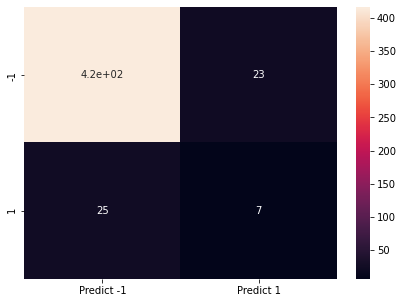

In [40]:
cm=metrics.confusion_matrix(y_test,test_pred,labels=[-1,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["-1","1"]],
                  columns=[i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

As can be seen above the model does a poor job at predicting the students who failed and true negative value is pretty low.

NOw let us fit the model on the upsampled data and check to see if it has any effect on predicting the true negatives
MODEL ON UPSAMPLED DATA

In [41]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8471337579617835
[[390  49]
 [ 23   9]]
              precision    recall  f1-score   support

        -1.0       0.94      0.89      0.92       439
         1.0       0.16      0.28      0.20        32

    accuracy                           0.85       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.85      0.87       471



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


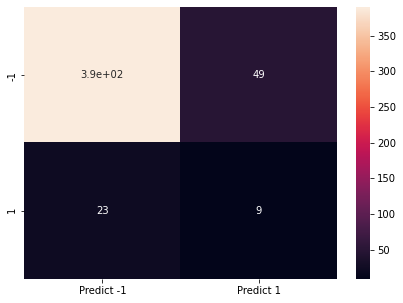

In [42]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[-1,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["-1","1"]],
                  columns=[i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

AS CAN BE SEEN UPSAMPLING DOES NOT HELP MUCH AS THE TRUE NEGATIVES ONLY GOES UP SLIGHTLY FROM 7 TO 9 WHICH IS NOT MUCH AND THE RECALL VALUE ALSO DOES NOT GO UP BY MUCH.

UNDERSAMPLING OF THE DATA SET USING imbLEARN

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
from imblearn.under_sampling import NearMiss

In [45]:
print("Before UnderSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UnderSampling, counts of label '1': {} \n".format((y_train==1).sum()))

undersample=RandomUnderSampler(return_indices=True)
X_train_rus, y_train_rus,id_rus = undersample.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '-1': {}".format((y_train_rus==-1).sum()))
print("After UnderSampling, counts of label '1': {} \n".format((y_train_rus==1).sum()))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus.shape))

Before UnderSampling, counts of label '-1': Pass/Fail    1024
dtype: int64
Before UnderSampling, counts of label '1': Pass/Fail    72
dtype: int64 

After UnderSampling, counts of label '-1': 72
After UnderSampling, counts of label '1': 72 

After UnderSampling, the shape of train_X: (144, 335)
After UnderSampling, the shape of train_y: (144, 1) 



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [46]:
# fit model on undersampled data 

model.fit(X_train_rus, y_train_rus)
y_predict_rus = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict_rus))
print(metrics.classification_report(y_test, y_predict_rus))

0.5095541401273885
[[224 215]
 [ 16  16]]
              precision    recall  f1-score   support

        -1.0       0.93      0.51      0.66       439
         1.0       0.07      0.50      0.12        32

    accuracy                           0.51       471
   macro avg       0.50      0.51      0.39       471
weighted avg       0.87      0.51      0.62       471



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


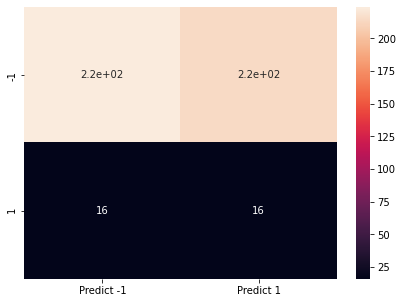

In [47]:
cm=metrics.confusion_matrix(y_test,y_predict_rus,labels=[-1,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["-1","1"]],
                  columns=[i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

OK AS WE CAN SEE UNDERSAMPLING DOES HELP A LOT BY INCREASING THE RECALL VALUE ALMOST DOUBLING FROM 28 TO TO ABOUT 62% AND ALSO THIS IS ACCOMAPNIES BY A SGNIFICANT TYPE 1 ERROR THAT IS COMING AND ALSO ACCOMPANIED BY A DECREASE IN THE ACCURACY SCORE

In [48]:
# split the full data 80:20 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(signal_df_new_X, signal_df_new_Y, train_size=0.8, random_state=1)

# split training data 87.5:12.5 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=1)

print("len(signal_df_new_X): {} len(signal_df_new_y): {} \nlen(X_train): {}, len(X_valid): {}, len(X_test): \
{} \nlen(y_train): {}, len(y_valid): {}, len(y_test): {}".format(len(signal_df_new_X), len(signal_df_new_Y),\
len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), \
len(y_test))) 

len(signal_df_new_X): 1567 len(signal_df_new_y): 1567 
len(X_train): 1096, len(X_valid): 314, len(X_test): 157 
len(y_train): 1096, len(y_valid): 314, len(y_test): 157


As before we will continue to undersample the data set and continue to use this methodology to get better result along with dimensionality reduciton techniques:

In [49]:
print("Before UnderSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UnderSampling, counts of label '1': {} \n".format((y_train==1).sum()))

undersample=RandomUnderSampler(return_indices=True)
X_train_rus, y_train_rus,id_rus = undersample.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '-1': {}".format((y_train_rus==-1).sum()))
print("After UnderSampling, counts of label '1': {} \n".format((y_train_rus==1).sum()))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus.shape))

Before UnderSampling, counts of label '-1': Pass/Fail    1019
dtype: int64
Before UnderSampling, counts of label '1': Pass/Fail    77
dtype: int64 

After UnderSampling, counts of label '-1': 77
After UnderSampling, counts of label '1': 77 

After UnderSampling, the shape of train_X: (154, 335)
After UnderSampling, the shape of train_y: (154, 1) 



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [51]:
svm = SVC(random_state=1, gamma = 'auto')
pipe = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components = 120)), ('model', svm)])
pipe.fit(X_train_rus, y_train_rus) #fitting undersample data

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=120)),
                ('model', SVC(gamma='auto', random_state=1))])

In [52]:
svm_score = pipe.score(X_valid, y_valid)
svm_score

0.6242038216560509

We will now implement K fold validation and check the scores, the k fold validation will subdivide the data once again in to multiple test and training tests and will evaluate the accuracy once again

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
num_folds = 80
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(svm, X_valid, y_valid, cv=kfold)

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [55]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.   0.75 0.75 0.5  1.   1.   1.   1.   1.   1.   1.   0.5  1.   1.
 1.   1.   1.   0.75 1.   1.   1.   1.   1.   0.75 1.   1.   1.   1.
 0.75 1.   0.75 1.   1.   1.   1.   1.   0.75 1.   0.75 1.   1.   1.
 0.75 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.75 0.75 0.75
 1.   1.   1.   1.   0.75 0.75 1.   1.   1.   1.   1.   0.75 1.   1.
 1.   0.75 1.   1.   1.   1.   1.   1.   1.   1.  ]
Accuracy: 93.750% (12.183%)


So the cross fold validation greatly increases the accuracy and the production accuracy will lie from 81% to 93%

HYPER PARAMETER TUNING - Let us now implement GRID search CV algorithm to get the best possible parameters to boost the accuracy

In [56]:
# Grid Search for tuning parameters
from sklearn.model_selection import GridSearchCV
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }

In [58]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [59]:
# fitting the model for grid search 
grid.fit(X_train_rus, y_train_rus) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.367, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.367, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [61]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=0.1, gamma=1)


In [62]:
grid_predictions = grid.predict(X_valid) 
grid_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [63]:
# print classification report 

print(metrics.classification_report(y_valid, grid_predictions))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       294
         1.0       0.06      1.00      0.12        20

    accuracy                           0.06       314
   macro avg       0.03      0.50      0.06       314
weighted avg       0.00      0.06      0.01       314



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AS CAN BE SEEN THE DRID PARAMETER SEARCH GIVES US THE BEST POSSIBLE COMBINATION AND ALMOST A 100% ACCURACY IN PREDICTING THE FAIL RATE.

LET US NOW RUN A RANDOM SEARCH CROSS VALIDATION TECHNIQUE

In [64]:
# run randomized search
samples = 10  # number of random samples 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }

In [65]:
randomCV = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=samples) #default cv = 3

In [66]:
randomCV.fit(X_train_rus, y_train_rus)

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

RandomizedSearchCV(estimator=SVC(gamma='auto', random_state=1),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [67]:
# print best parameter after tuning 
print(randomCV.best_params_) 

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}


In [68]:
# print how our model looks after hyper-parameter tuning 
print(randomCV.best_estimator_) 

SVC(C=100, gamma=0.0001, random_state=1)


In [69]:
random_predictions = randomCV.predict(X_valid) 

In [70]:
# print classification report 

print(metrics.classification_report(y_valid, grid_predictions))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       294
         1.0       0.06      1.00      0.12        20

    accuracy                           0.06       314
   macro avg       0.03      0.50      0.06       314
weighted avg       0.00      0.06      0.01       314



C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
